In [15]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold 

In [16]:
dataset = datasets.fetch_openml("mnist_784", version =1, return_X_y=True)

pixel_values, targets = dataset
targets = targets.astype(int)

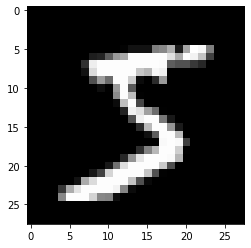

In [17]:
image = pixel_values[0, :].reshape(28,28)
plt.imshow(image, cmap="gray")

In [18]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [19]:
# Convert data to a pandas dataframe 

tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [20]:
tsne_df.head(10)

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9
5,63.997231,-1.102326,2
6,-6.551701,9.943600,1
7,20.086042,-44.003902,3
8,-0.806248,12.682267,1
9,-1.481194,45.506077,4


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


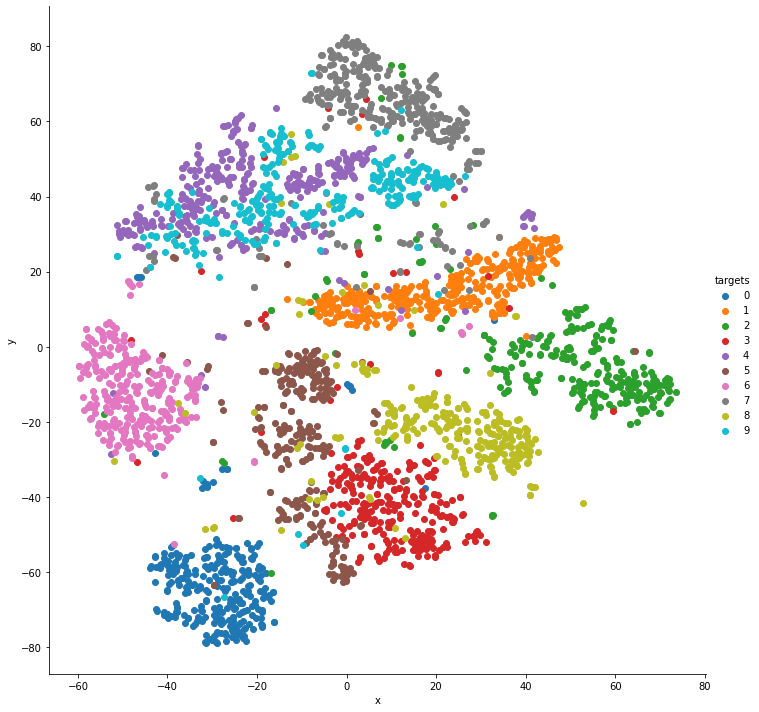

In [21]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=10)
grid.map(plt.scatter, "x", "y").add_legend()